# EEG data analysis results

In [55]:
import pickle
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

In [108]:
# util function to read file
def read_file(filename):
    with open(filename, 'rb') as file:
        loaded_file = pickle.load(file)
    return loaded_file

# plot
def plot_map(l_array, r_array, title):
    fig, ax = plt.subplots(nrows = 1, ncols =2, figsize=(16,10))

    l = ax[0].imshow(np.mean(l_array, axis=0).T, origin='lower', cmap='plasma')
    r = ax[1].imshow(np.mean(r_array, axis=0).T, origin='lower', cmap='cividis')

    l_cbar = ax[0].figure.colorbar(l, label='bits', location = 'bottom', pad = 0.1)
    r_cbar = ax[1].figure.colorbar(r, label='bits', location = 'bottom', pad = 0.1)

    formatter = ticker.ScalarFormatter(useMathText=True)
    formatter.set_scientific(True)
    formatter.set_powerlimits((-2, 2))  

    l_cbar.ax.xaxis.set_major_formatter(formatter)
    r_cbar.ax.xaxis.set_major_formatter(formatter)   

    ax[0].set_xlim(0,290)
    ax[1].set_xlim(0,290)

    ax[0].set_xlabel('peri-stimulus time (ms)')
    ax[1].set_xlabel('peri-stimulus time (ms)')

    ax[0].set_ylabel('delay (ms)')
    ax[1].set_ylabel('delay (ms)')

    ax[0].set_title('Left ' + title)
    ax[1].set_title('Right ' + title)

    plt.show()

In [24]:
# files
left_fit_file = 'eeg_left_fit_values.pkl'
right_fit_file = 'eeg_right_fit_values.pkl'

left_dfi_file = 'eeg_left_dfi_values.pkl'
right_dfi_file = 'eeg_right_dfi_values.pkl'

left_di_file = 'eeg_left_di_values.pkl'
right_di_file = 'eeg_right_di_values.pkl'

left_TEQe_file = 'eeg_left_TEQe_values.pkl'
right_TEQe_file = 'eeg_right_TEQe_values.pkl'

left_TELe_file = 'eeg_left_TELe_values.pkl'
right_TELe_file = 'eeg_right_TELe_values.pkl'

left_FITQe_file = 'eeg_left_FITQe_values.pkl'
right_FITQe_file = 'eeg_right_FITQe_values.pkl'

left_FITLe_file = 'eeg_left_FITLe_values.pkl'
right_FITLe_file = 'eeg_right_FITLe_values.pkl'

# load
left_fit = read_file(left_fit_file)
right_fit = read_file(right_fit_file)

left_dfi = read_file(left_dfi_file)
right_dfi = read_file(right_dfi_file)

left_di = read_file(left_di_file)
right_di = read_file(right_di_file)

left_TEQe = read_file(left_TEQe_file)
right_TEQe = read_file(right_TEQe_file)

left_TELe = read_file(left_TELe_file)
right_TELe = read_file(right_TELe_file)

left_FITQe = read_file(left_FITQe_file)
right_FITQe = read_file(right_FITQe_file)

left_FITLe = read_file(left_FITLe_file)
right_FITLe = read_file(right_FITLe_file)

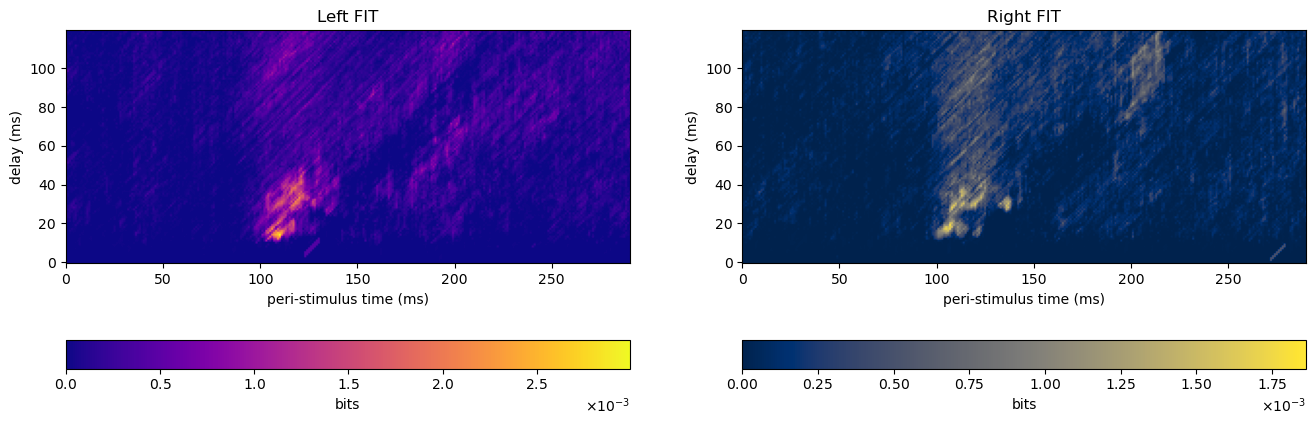

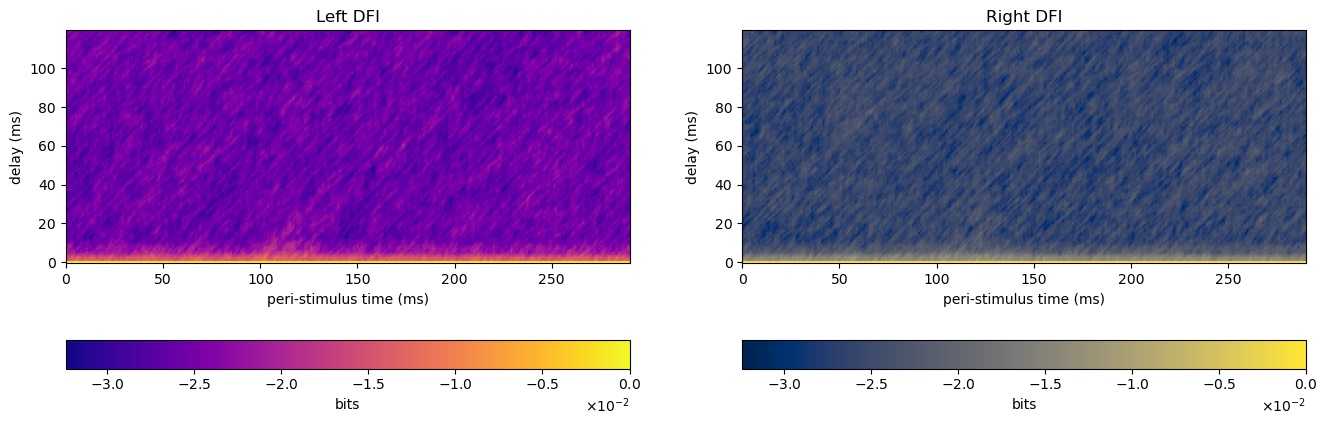

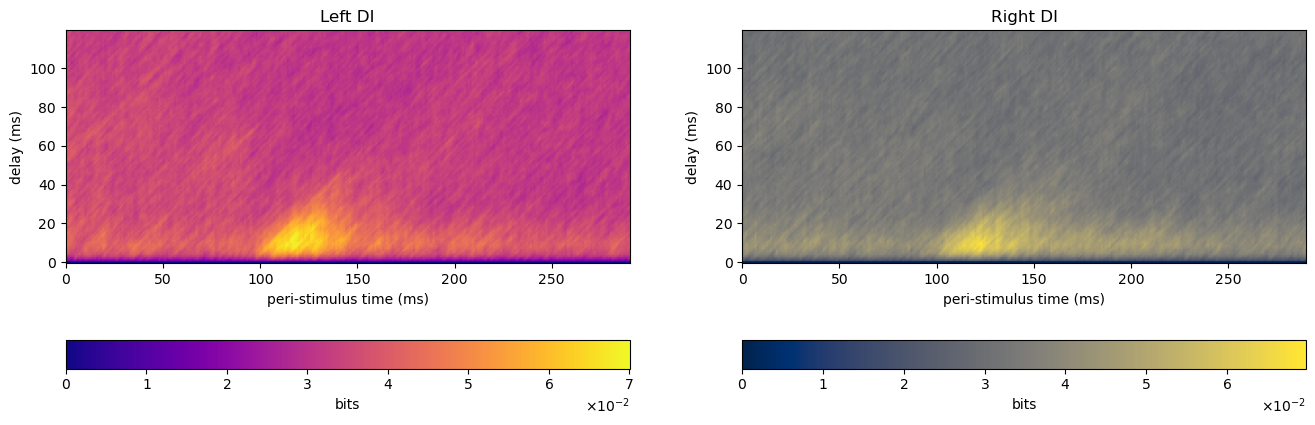

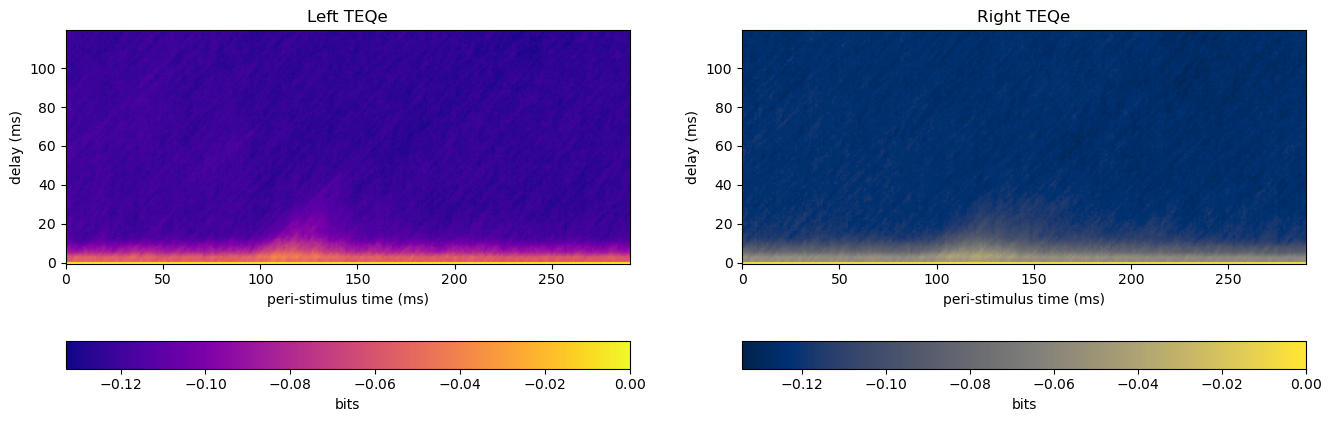

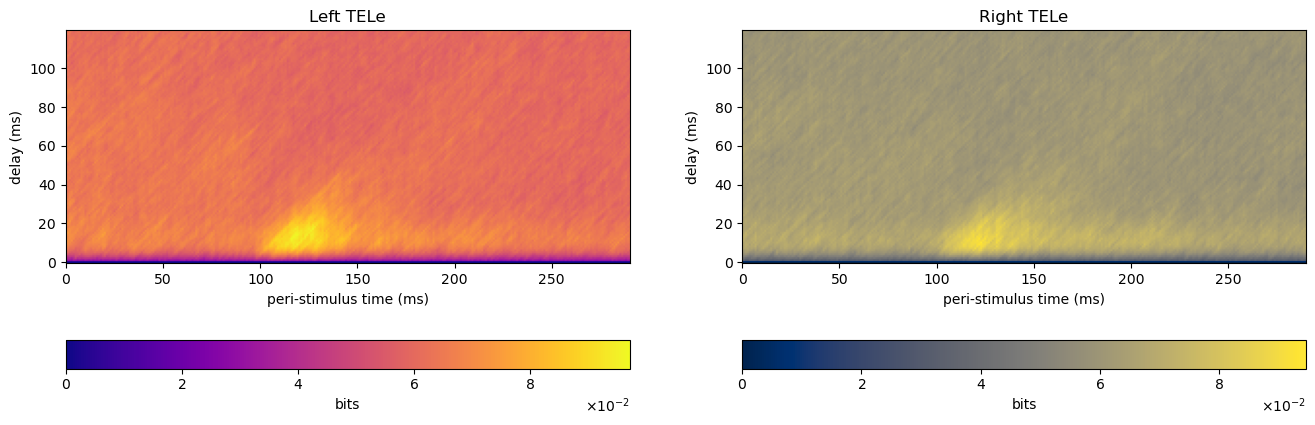

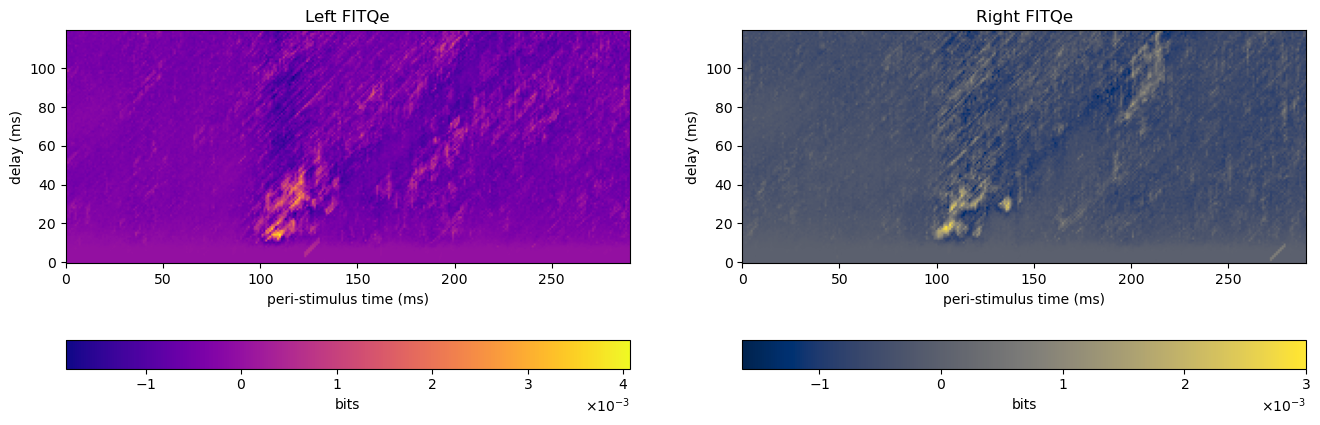

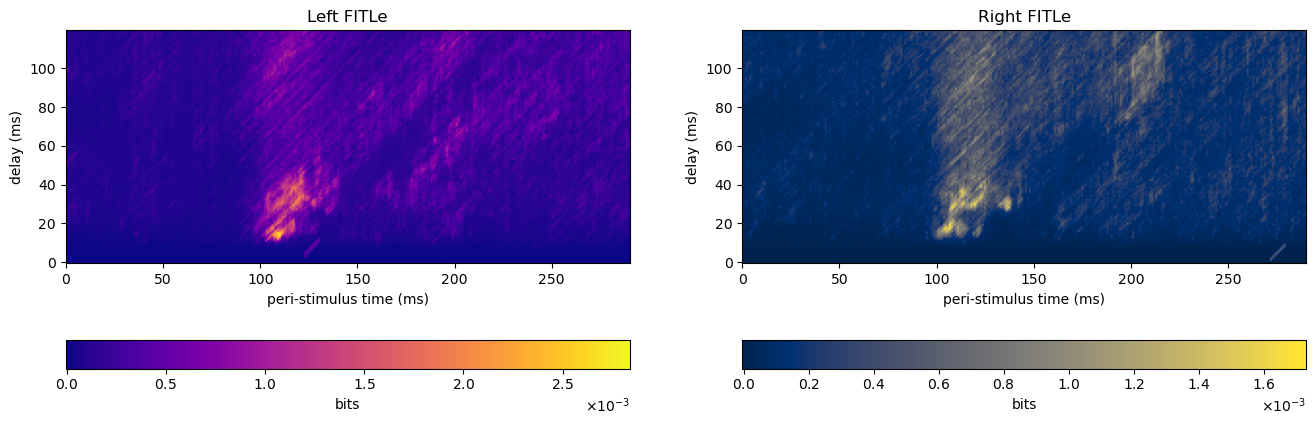

In [109]:
# plots
plot_map(left_fit, right_fit, 'FIT')
plot_map(left_dfi, right_dfi, 'DFI')
plot_map(left_di, right_di, 'DI')
plot_map(left_TEQe, right_TEQe, 'TEQe')
plot_map(left_TELe, right_TELe, 'TELe')
plot_map(left_FITQe, right_FITQe, 'FITQe')
plot_map(left_FITLe, right_FITLe, 'FITLe')